In [1]:
%matplotlib inline
import cv2
import numpy as np
from model.augmentations import randomHueSaturationValue, randomShiftScaleRotate, randomHorizontalFlip
import model.u_net as unet
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array
from PIL import Image
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
path1 = '/home/pranav/Desktop/internship/ger/Datenschmiede test task/images/'
path2 = '/home/pranav/Desktop/internship/ger/Datenschmiede test task/labels/'
images_train = os.listdir(path1)
labels_train = os.listdir(path2)

In [3]:
len(images_train)

25

In [4]:
Input_train = []
train_label = []
for data in images_train:
    img1 = cv2.imread(path1+data)
    img2 = cv2.imread(path2+data)
    Input_train.append(img1)
    train_label.append(img2)

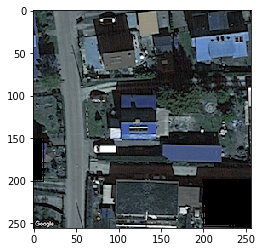

In [5]:
plt.imshow(Input_train[0])
plt.show()

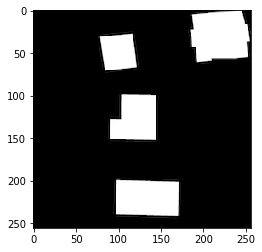

In [6]:
plt.imshow(train_label[0])
plt.show()

In [7]:
model = unet.get_unet_256(num_classes=1)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 256, 256, 32) 128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 256, 256, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [8]:
SIZE = (256, 256)

In [9]:
def train_process(img,mask):
    img = img[:,:,:3]
    mask = mask[:, :, :3]
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    mask[mask < 100] = 0.0
    mask[mask >= 100] = 255.0
    img = cv2.resize(img, SIZE)
    mask = cv2.resize(mask, SIZE)
    img = img/255.
    mask = mask/255.
    mask = np.expand_dims(mask, axis=2)
    return (img, mask)

In [10]:
def validation_process(img,mask):
    img = img[:,:,:3]
    mask = mask[:, :, :3]
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    mask[mask < 100] = 0.0
    mask[mask >= 100] = 255.0
    img = cv2.resize(img, SIZE)
    mask = cv2.resize(mask, SIZE)
    img = img/255.
    mask = mask/255.
    mask = np.expand_dims(mask, axis=2)
    return (img, mask)

In [11]:
BATCH_SIZE = 1

In [12]:
X_train, X_val, y_train, y_val = train_test_split(Input_train, train_label, test_size=0.2)

In [13]:
print('training data size', len(X_train))
print('Validation data size', len(X_val))

training data size 20
Validation data size 5


In [14]:
for i in range(len(X_train)):
    X_train[i], y_train[i] = train_process(X_train[i] , y_train[i])
for i in range(len(X_val)):
    X_val[i], y_val[i] = validation_process(X_val[i] , y_val[i])
    

In [41]:
callbacks = [EarlyStopping(monitor='val_loss',
                           patience=8,
                           verbose=1,
                           min_delta=1e-4),
             ReduceLROnPlateau(monitor='val_loss',
                               factor=0.1,
                               patience=4,
                               verbose=1,
                               epsilon=1e-4),
             ModelCheckpoint(monitor='val_loss',
                             filepath='weights/best_weights.hdf5',
                             save_best_only=True,
                             save_weights_only=True)]

In [42]:
model.fit(x=np.array(X_train), y=np.array(y_train), batch_size=1, epochs=100, callbacks=callbacks, validation_data=(np.array(X_val),np.array(y_val)))

Train on 20 samples, validate on 5 samples
Epoch 1/100
20/20 [==============================] - 293s 15s/step - loss: 1.4894 - dice_coeff: 0.2793 - val_loss: 1.4743 - val_dice_coeff: 0.2001
Epoch 2/100
20/20 [==============================] - 245s 12s/step - loss: 1.2116 - dice_coeff: 0.3599 - val_loss: 1.4413 - val_dice_coeff: 0.1980
Epoch 3/100
20/20 [==============================] - 232s 12s/step - loss: 1.0331 - dice_coeff: 0.4125 - val_loss: 1.3852 - val_dice_coeff: 0.1938
Epoch 4/100
20/20 [==============================] - 230s 12s/step - loss: 0.8440 - dice_coeff: 0.4826 - val_loss: 1.3356 - val_dice_coeff: 0.1874
Epoch 5/100
20/20 [==============================] - 240s 12s/step - loss: 0.7593 - dice_coeff: 0.5289 - val_loss: 1.2953 - val_dice_coeff: 0.1790
Epoch 6/100
20/20 [==============================] - 248s 12s/step - loss: 0.6974 - dice_coeff: 0.5594 - val_loss: 1.2725 - val_dice_coeff: 0.1770
Epoch 7/100
20/20 [==============================] - 241s 12s/step - loss: 

In [33]:
path3 = '/home/pranav/Desktop/internship/ger/Datenschmiede test task/test_images/'
images_test = os.listdir(path3)

In [34]:
Input_test = []
for data in images_test:
    img1 = cv2.imread(path3+data)
    Input_test.append(img1)

In [39]:
image_batch = Input_test
predicted_mask_batch = model.predict(np.array(image_batch))
image = image_batch[0]
predicted_mask = predicted_mask_batch[0].reshape(SIZE)


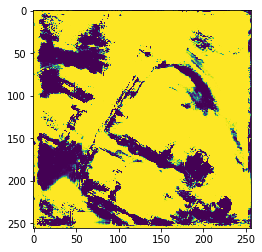

In [42]:
plt.imshow(predicted_mask)

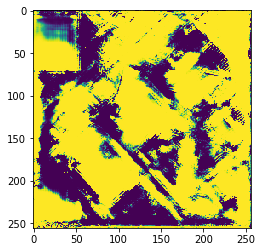

In [43]:
predicted_mask = predicted_mask_batch[1].reshape(SIZE)
plt.imshow(predicted_mask)

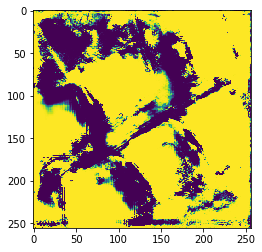

In [44]:
predicted_mask = predicted_mask_batch[2].reshape(SIZE)
plt.imshow(predicted_mask)

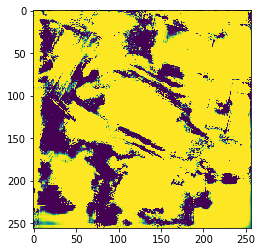

In [45]:
predicted_mask = predicted_mask_batch[3].reshape(SIZE)
plt.imshow(predicted_mask)

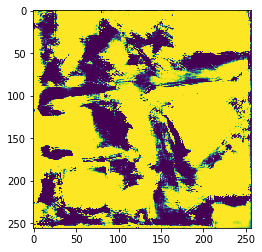

In [46]:
predicted_mask = predicted_mask_batch[4].reshape(SIZE)
plt.imshow(predicted_mask)